In [1]:
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import cmocean as cm

# import numpy as np
# import pandas as pd
# import netCDF4 as nc
# 
# import glob
# import os
# import datetime
# import pickle
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# from sys import platform

%matplotlib inline

In [2]:
run_tags = ['outdated', 'updated','updated and visserwithwaves']
base_directory = Path('/Users/rmueller/Projects/MIDOSS/results/visser/')
data={}
thickness2D={}
for run_num in range(3):
    data[f'run{run_num}'] = xr.open_dataset(base_directory/f'akns_sog_15jan18_run{run_num}'/'Lagrangian_AKNS_crude_SOG_15jan18-22jan18.nc')
    thickness2D[f'run{run_num}'] = data[f'run{run_num}'].Thickness_2D.sum(dim='time')

### First stop: Evaluate Concentration_2D

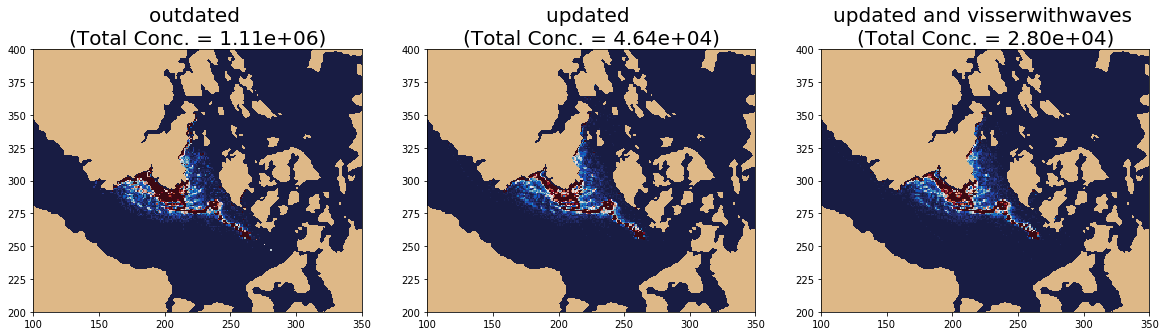

In [3]:
fs = 20
fig,axs = plt.subplots(1,3,figsize=(20,20))
axs = axs.ravel()

for run_num in range(3):
    mappable = axs[run_num].pcolormesh(thickness2D[f'run{run_num}'].values, vmin = 0, vmax = 40, cmap = cm.cm.balance)
    # add land mask to ax1 and ax2
    viz_tools.plot_land_mask(axs[run_num],'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
    axs[run_num].set_xlim(100,350)
    axs[run_num].set_ylim(200,400)
    axs[run_num].set_aspect('equal')
    thickness_sum = thickness2D[f'run{run_num}'].values.sum()
    title_string = f'{run_tags[run_num]} \n(Total Conc. = {thickness_sum:2.2e})'
    axs[run_num].set_title(title_string,fontsize=fs)
    

### Now compare water column values between visser and visserwithwave cases 
(.sro values will need to wait until power outage is over)

In [10]:
wcvol3d = {}
for run_num in [1,2]:
    wcvol3d[f'run{run_num}'] = data[f'run{run_num}'].OilWaterColumnOilVol_3D.values.sum(axis=0)
    print(wcvol3d[f'run{run_num}'].shape)

(40, 896, 396)
(40, 896, 396)


In [22]:
print(data['run1'].OilWaterColumnOilVol_3D.values.shape)
print(data['run2'].OilWaterColumnOilVol_3D.values.shape)

(164, 40, 896, 396)
(153, 40, 896, 396)


### Note: Visserwithwave didn't finish.  Investigate.  Time series is shorter than visser run. 

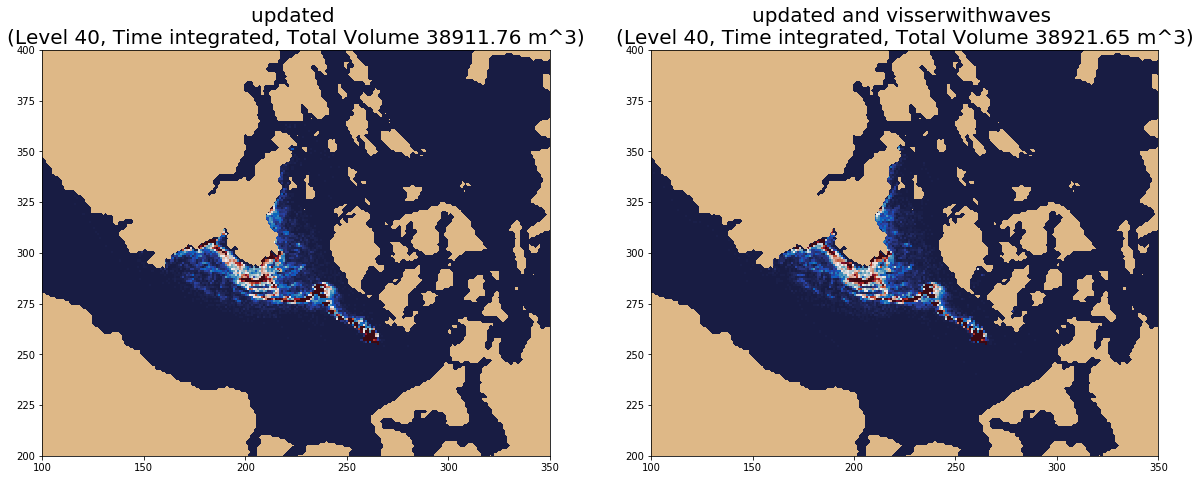

In [16]:
fs = 20
fig,axs = plt.subplots(1,2,figsize=(20,20))
axs = axs.ravel()
for run_num in [1,2]:
    [nz,ny,nx] = wcvol3d[f'run{run_num}'].shape
    mappable = axs[run_num-1].pcolormesh(wcvol3d[f'run{run_num}'][39,:,:], vmin = 0, vmax = 40, cmap = cm.cm.balance)
    # add land mask to ax1 and ax2
    viz_tools.plot_land_mask(axs[run_num-1],'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
    axs[run_num-1].set_xlim(100,350)
    axs[run_num-1].set_ylim(200,400)
    axs[run_num-1].set_aspect('equal')
    volume_sum = wcvol3d[f'run{run_num}'][-1,:,:].sum()
    title_string = f'{run_tags[run_num]} \n(Level {nz}, Time integrated, Total Volume {volume_sum:2.2f} m^3)'
    axs[run_num-1].set_title(title_string,fontsize=fs)

#### Now try one below the surface

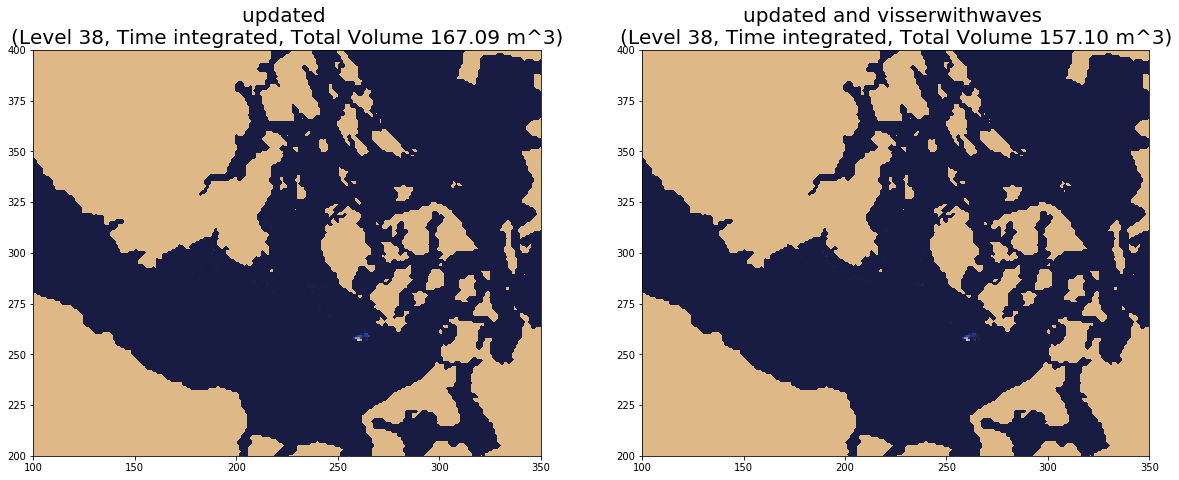

In [20]:
fig,axs = plt.subplots(1,2,figsize=(20,20))
axs = axs.ravel()

# depth index to plot
zi = 38
for run_num in [1,2]:
    [nz,ny,nx] = wcvol3d[f'run{run_num}'].shape
    mappable = axs[run_num-1].pcolormesh(wcvol3d[f'run{run_num}'][zi,:,:], vmin = 0, vmax = 40, cmap = cm.cm.balance)
    # add land mask to ax1 and ax2
    viz_tools.plot_land_mask(axs[run_num-1],'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
    axs[run_num-1].set_xlim(100,350)
    axs[run_num-1].set_ylim(200,400)
    axs[run_num-1].set_aspect('equal')
    volume_sum = wcvol3d[f'run{run_num}'][zi,:,:].sum()
    title_string = f'{run_tags[run_num]} \n(Level {zi}, Time integrated, Total Volume {volume_sum:2.2f} m^3)'
    axs[run_num-1].set_title(title_string,fontsize=fs)

### There is less integrated volume in the level below surface for the Visserwithwave case than visser. 
### This difference may be from the reduced time period (164 vs 153 values), but the location of these values indicates that this mixing happened early in the run and that the particles then went to the surface and were beached.  
### Next step: Compare this version of Visserwithwave to the one Shihan committed to see what I changed in the code.  